##### 1.1a
- Rescaling values required
- I want to get a correlation value per state (crude)
- I want to get a correlation value per state (age adjusted)

##### 1.1b
- I want to get a correlation per year of all the states.
so: 

for states in states:
    cor.append(cor(statesYear1,stateYear1))
    

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

In [3]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [4]:
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=360)

In [108]:
def getCor(query,type_,year):
    
    if type_ == 'AAP':
        if year == 2011:
            year = '2011-01-01 2011-12-31'
            gt_Year_Type = 'data/BRFSS/2011_AA.csv'
        if year == 2012:
            year = '2012-01-01 2012-12-31'
            gt_Year_Type = 'data/BRFSS/2012_AA.csv'
        if year == 2013:
            year = '2013-01-01 2013-12-31'
            gt_Year_Type = 'data/BRFSS/2013_AA.csv'
        if year == 2014:
            year = '2014-01-01 2014-12-31'
            gt_Year_Type = 'data/BRFSS/2014_AA.csv'
        if year == 2015:
            year = '2015-01-01 2015-12-31'
            gt_Year_Type = 'data/BRFSS/2015_AA.csv'
        if year == 2016:
            year = '2016-01-01 2016-12-31'
            gt_Year_Type = 'data/BRFSS/2016_AA.csv'
        
    if type == 'CP':
        if year == 2011:
            year = '2011-01-01 2011-12-31'
            gt_Year_Type = 'data/BRFSS/2011.csv'
        if year == 2012:
            year = '2012-01-01 2012-12-31'
            gt_Year_Type = 'data/BRFSS/2012.csv'
        if year == 2013:
            year = '2013-01-01 2013-12-31'
            gt_Year_Type = 'data/BRFSS/2013.csv'
        if year == 2014:
            year = '2014-01-01 2014-12-31'
            gt_Year_Type = 'data/BRFSS/2014.csv'
        if year == 2015:
            year = '2015-01-01 2015-12-31'
            gt_Year_Type = 'data/BRFSS/2015.csv'
        if year == 2016:
            year = '2016-01-01 2016-12-31'
            gt_Year_Type = 'data/BRFSS/2016.csv'
    
    kw_list = query
    #kw_list=['kidney']
    pytrends.build_payload(kw_list, cat=0, timeframe=year, geo='US', gprop='')
    googleTrend = pytrends.interest_by_region()
    df_gt = pd.read_csv(gt_Year_Type, sep=";")
    df_gt = df_gt[np.logical_not(pd.to_numeric(df_gt.LocationAbbr, errors='coerce').notnull())]
    df_gt = df_gt.dropna(subset=['LocationAbbr']) 
#   googleTrend = outputQueryAPI (query,year)  # GABRIEL API
    #googleTrend = pd.read_csv(query,sep=",")

    print(googleTrend)
    g = (googleTrend[1:])
    g = g.convert_objects(convert_numeric=True)
    g = g.sort_index()
    google_values = [x[0] for x in g.values]
    google_states = []
    st = dict((y,x) for x, y in states.items())
    index = list(g.index)
    google_states = []
    for state in st:
        if state in index:
            google_states.append(st[state])
    d = {'idx': google_values, 'stat': google_states}
    d = pd.DataFrame(data=d)
    df2_gt = df_gt
    df2_gt = df2_gt[df2_gt['LocationAbbr'].isin(google_states)]

    # create a compact ground truth dataframe
    df2_gt = pd.DataFrame(data=list(df2_gt.Data_Value), index=list(df2_gt.LocationAbbr), columns=['value'],
                          dtype=np.float)

    google_df = pd.DataFrame(data=google_values, index=google_states, columns=['value'], dtype=np.float)

    # normalizing
    df2_gt = (df2_gt - df2_gt.mean())/df2_gt.std()
    google_df = (google_df - google_df.mean())/google_df.std()

    # order
    df2_gt = df2_gt.sort_index()
    google_df = google_df.sort_index()
    cor = pearsonr(df2_gt, google_df)[0][0]
    
    
    
    return cor




#getCor(gt_Year_Type="data/BRFSS/2013_AA.csv",query="data/GoogleTrends/2013_kidneyDysplasia.csv",year = 1,type_= "AA")
nQueries = 10
nYears = 6
corrMat = np.empty(shape=(nQueries*nYears,2))


queries = ["kidney"]
getCor(query = queries,year = 2011,type_= "AAP")



                      kidney
geoName                     
Alabama                   83
Alaska                    77
Arizona                   79
Arkansas                  85
California                62
Colorado                  68
Connecticut               71
Delaware                  69
District of Columbia      69
Florida                   73
Georgia                   81
Hawaii                    77
Idaho                     79
Illinois                  72
Indiana                   78
Iowa                      75
Kansas                    73
Kentucky                  91
Louisiana                 82
Maine                     82
Maryland                  73
Massachusetts             70
Michigan                  76
Minnesota                 74
Mississippi               90
Missouri                  81
Montana                   72
Nebraska                  76
Nevada                    69
New Hampshire             75
New Jersey                72
New Mexico                80
New York      

-0.027712478273965148

In [ ]:
google

# 2013

In [94]:
queries = ["kidney", "stones", "CKD","dysplasia","renal","disease"]
cor2013AA = []
for qTerm in queries:
   # for i in range(corrMat.shape(0)):
        #for j in range(corrMat.shape(1))
    cor2013AA.append(getCor(gt_Year_Type="data/BRFSS/2013_AA.csv",query=[qTerm],year = 2013,type_= "AA"))
d = {'QTerm': queries, 'Correlation': cor2013AA}
df = pd.DataFrame(data=d)
#print(df.to_string(index=False))
df

,Correlation,QTerm
0,-0.034218,kidney
1,-0.286456,stones
2,0.005289,CKD
3,-0.201803,dysplasia
4,-0.163754,renal
5,-0.399316,disease
6,-0.238580,sun


In [95]:
queries = ["kidney", "stones", "CKD","dysplasia","renal","disease"]
cor2013 = []
for qTerm in queries:
   # for i in range(corrMat.shape(0)):
        #for j in range(corrMat.shape(1))
    cor2013.append(getCor(gt_Year_Type="data/BRFSS/2013.csv",query=[qTerm],year = 2013,type_= "AA"))
d = {'QTerm': queries, 'Correlation': cor2013}
df = pd.DataFrame(data=d)
#print(df.to_string(index=False))
df

,Correlation,QTerm
0,-0.037481,kidney
1,-0.307183,stones
2,-0.010989,CKD
3,-0.157735,dysplasia
4,-0.083448,renal
5,-0.363261,disease
6,-0.207938,sun


# 2014

In [96]:
queries = ["kidney", "stones", "CKD","dysplasia","renal","disease"]
cor2014 = []
for qTerm in queries:
   # for i in range(corrMat.shape(0)):
        #for j in range(corrMat.shape(1))
    cor2014.append(getCor(gt_Year_Type="data/BRFSS/2014.csv",query=[qTerm],year = 2014,type_= "AA"))
d = {'QTerm': queries, 'Correlation': cor2014}
df = pd.DataFrame(data=d['Correlation'],index=queries)

#print(df.to_string(index=False))
df

,0
kidney,-0.017386
stones,-0.129865
CKD,0.086528
dysplasia,-0.182973
renal,-0.024556
disease,-0.185109
sun,-0.062298


In [71]:
queries = ["kidney", "stones", "CKD","dysplasia","renal","disease"]
cor2014AA = []
for qTerm in queries:
   # for i in range(corrMat.shape(0)):
        #for j in range(corrMat.shape(1))
    cor2014AA.append(getCor(gt_Year_Type="data/BRFSS/2014_AA.csv",query=[qTerm],year = 2014,type_= "AA"))
d = {'QTerm': queries, 'Correlation': cor2014AA}
df = pd.DataFrame(data=d['Correlation'],index=queries)
#print(df.to_string(index=False))
df

,0
kidney,-0.059186
stones,-0.080727
CKD,0.085619
dysplasia,-0.212655
renal,-0.138870
disease,-0.268379


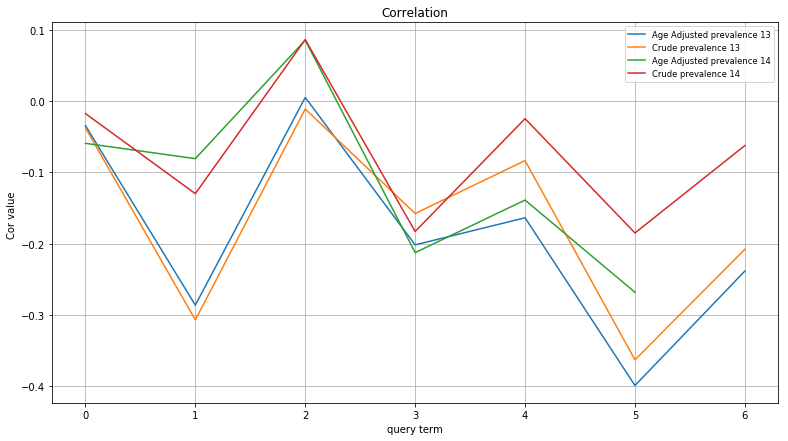

In [98]:
plt.figure(figsize=(13,7))
plt.plot(cor2013AA, label ="Age Adjusted prevalence 13")
plt.plot(cor2013, label = "Crude prevalence 13")
plt.plot(cor2014AA, label ="Age Adjusted prevalence 14")
plt.plot(cor2014, label = "Crude prevalence 14")
plt.legend(fontsize="small")
plt.xlabel("query term")
plt.ylabel("Cor value ")
plt.title("Correlation")
plt.grid()
#plt.xticks(queries)

plt.show()

In [91]:
cor2013

[-0.034778776713537927,
 -0.31905788971195209,
 0.019878731537653023,
 -0.20046605879422852,
 -0.076879881386819546,
 -0.36495013506534713]

In [52]:
corrMat.shape[0]

60

In [ ]:
corrMat[0,0] = getCor(gt_Year_Type="data/BRFSS/2013_AA.csv",query="data/GoogleTrends/2013_kidneyDysplasia.csv",year = 1,type_= "AA")

corrMat

### Ground Truth data treatment

In [24]:
df_gt = pd.read_csv("data/BRFSS/2013_AA.csv", sep=";")#2016 210
df_gt = df_gt[np.logical_not(pd.to_numeric(df_gt.LocationAbbr, errors='coerce').notnull())]
df_gt = df_gt.dropna(subset=['LocationAbbr'])   #Drop only if NaN in specific column (as asked in the question)

### Google data treatment

In [25]:
gk2011 = pd.read_csv("data/GoogleTrends/2013_kidneyDysplasia.csv",sep=",")
g = (gk2011[1:])
g = g.convert_objects(convert_numeric=True)
g = g.sort_index()
#g= dict(keys=list(g.index),values = g.values)
print((g))
google_values = [x[0] for x in g.values]

                      Category: Health
Alabama                            100
Arizona                             12
California                          13
Colorado                            17
Connecticut                         19
District of Columbia                37
Florida                             11
Georgia                             13
Illinois                            18
Indiana                             36
Kentucky                            43
Louisiana                           20
Maryland                            34
Massachusetts                       34
Michigan                            29
Minnesota                           11
Missouri                            27
New Jersey                          19
New York                            13
North Carolina                      17
Ohio                                13
Oklahoma                            23
Oregon                              16
Pennsylvania                        20
South Carolina           

/Users/giacomomaretto/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
list(g.index)

['Alabama',
 'Arizona',
 'California',
 'Colorado',
 'Connecticut',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Illinois',
 'Indiana',
 'Kentucky',
 'Louisiana',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Missouri',
 'New Jersey',
 'New York',
 'North Carolina',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'South Carolina',
 'Tennessee',
 'Texas',
 'Virginia',
 'Washington',
 'Wisconsin']

In [27]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}



In [28]:
google_states = []
st = dict((y,x) for x, y in states.items())
index = list(g.index)
google_states = []
for state in st:
    if state in index:
        google_states.append(st[state])
#print(len(google_states), len(google_values))
#len(set(google_values).difference(set(google_states)))



In [29]:
d = {'idx': google_values, 'stat': google_states}
d = pd.DataFrame(data=d)
#dpd.DataFrame(data = df, columns= ['idx','stat'])

In [30]:
# select the same states on the GT and the Google data (standardize)
df2_gt = df_gt
df2_gt = df2_gt[df2_gt['LocationAbbr'].isin(google_states)]

# create a compact ground truth dataframe
df2_gt = pd.DataFrame(data=list(df2_gt.Data_Value), index=list(df2_gt.LocationAbbr), columns=['value'],
                      dtype=np.float)

google_df = pd.DataFrame(data=google_values, index=google_states, columns=['value'], dtype=np.float)

# normalizing
df2_gt = (df2_gt - df2_gt.mean())/df2_gt.std()
google_df = (google_df - google_df.mean())/google_df.std()

# order
df2_gt = df2_gt.sort_index()
google_df = google_df.sort_index()



In [31]:
from pydoc import help
from scipy.stats.stats import pearsonr
#help(pearsonr)
cor11 = pearsonr(df2_gt, google_df)[0][0]


In [32]:
cor11

0.07684409318748793